In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [6]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [7]:
#checking the dataset distribution
data['churn'].value_counts()/len(data)

churn
0    0.806317
1    0.193683
Name: count, dtype: float64

In [8]:
#seperating the dataset dependent and independent variables
X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [9]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [10]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.80,stratify=Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [11]:
#building the model
from sklearn.linear_model import LogisticRegression as LR
classifier=LR(class_weight='balanced')

In [12]:
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_test)#predicting class
predicted_probabilities=classifier.predict_proba(x_test)#predicting prbability

In [13]:
predicted_values

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [14]:
predicted_probabilities,predicted_probabilities.shape

(array([[0.63344541, 0.36655459],
        [0.62090736, 0.37909264],
        [0.43416905, 0.56583095],
        ...,
        [0.60553345, 0.39446655],
        [0.43330355, 0.56669645],
        [0.54416434, 0.45583566]]),
 (4414, 2))

In [15]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predicted_values)
cf

array([[2603,  956],
       [ 321,  534]], dtype=int64)

In [16]:
#accuracy
classifier.score(x_test,y_test)

0.7106932487539647

In [17]:
#precession
from sklearn.metrics import precision_score
precision=precision_score(y_test,predicted_values)
precision

0.35838926174496644

In [18]:
#recall
from sklearn.metrics import recall_score
Recall=recall_score(y_test,predicted_values)
Recall

0.624561403508772

In [19]:
#f1 score
f1=2/((1/precision)+(1/Recall))
f1

0.45543710021321965

In [20]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,predicted_values)
f1

0.4554371002132196

In [21]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)


In [37]:
precision

array([0.89039666, 0.35064935])

In [38]:
recall

array([0.7190222 , 0.63157895])

In [39]:
f1

array([0.79558526, 0.45093946])

In [40]:
support

array([3559,  855], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      3559
           1       0.36      0.62      0.46       855

    accuracy                           0.71      4414
   macro avg       0.62      0.68      0.63      4414
weighted avg       0.79      0.71      0.74      4414



In [23]:
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points=precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((4414,), (4414,), (4413,))

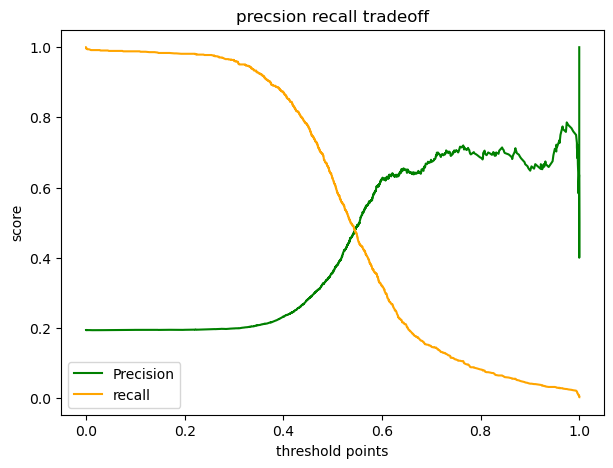

In [24]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color='green',label='Precision')
plt.plot(threshold_points,recall_points[:-1],color='orange',label='recall')
plt.xlabel('threshold points')
plt.ylabel('score')
plt.title('precsion recall tradeoff')
plt.legend()

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,predicted_probabilities[:,1])

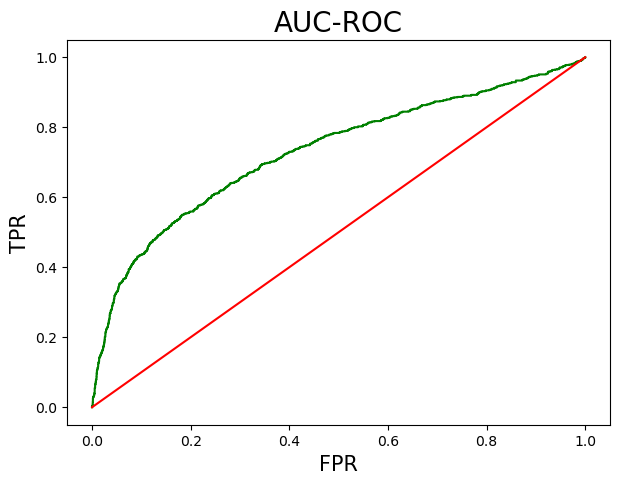

0.7291393699196009

In [28]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])


In [30]:
#arraging the data
c=classifier.coef_.reshape(-1)
x=X.columns

coeff_plot=pd.DataFrame({'coefficients':c,
                       'variables':x})

#sorting the values
coeff_plot=coeff_plot.sort_values(by='coefficients')
coeff_plot.head()

,coefficients,variables
9,-2.561162,current_balance
13,-0.576947,current_month_credit
18,-0.192841,previous_month_balance
0,-0.172716,vintage
8,-0.138828,days_since_last_transaction


Text(0.5, 1.0, 'coefficients plot')

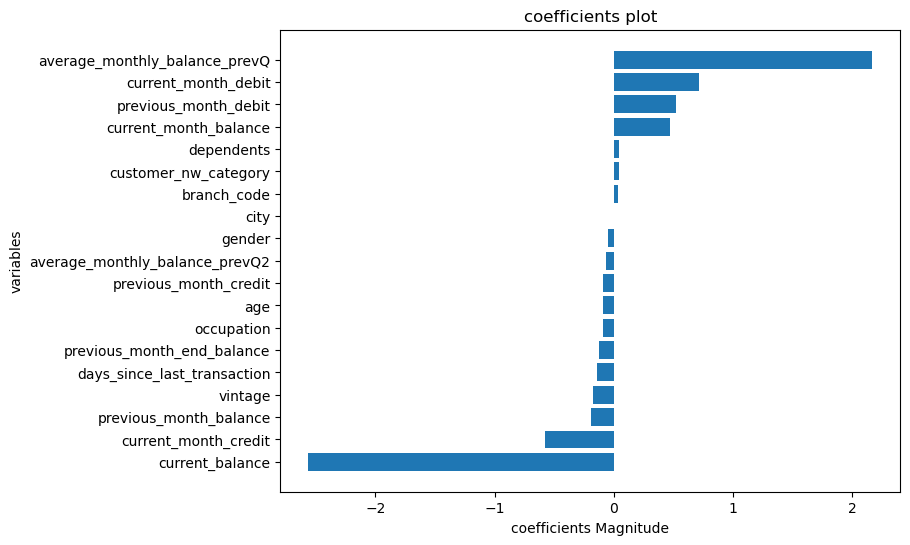

In [33]:
plt.figure(figsize=(8,6),dpi=100)
plt.barh(coeff_plot['variables'],coeff_plot['coefficients'])
plt.xlabel("coefficients Magnitude")
plt.ylabel("variables")
plt.title("coefficients plot")